In [3]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import imageio
from PIL import Image

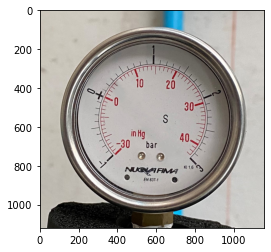

(1120, 1155, 3)


In [7]:
# Import image
img_path = "gauge.png"

img = cv2.imread(img_path)

# Show image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
print(img.shape)

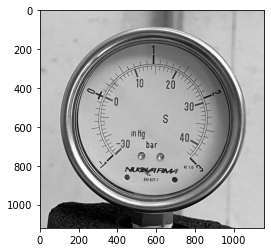

In [9]:
# Turn BGR to Gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap="gray")
plt.show()

## Thresholding

In [10]:
ret, thresh = cv2.threshold(gray, 80, 180, cv2.THRESH_BINARY)
ret, thresh1 = cv2.threshold(gray, 80, 180, cv2.THRESH_BINARY_INV)

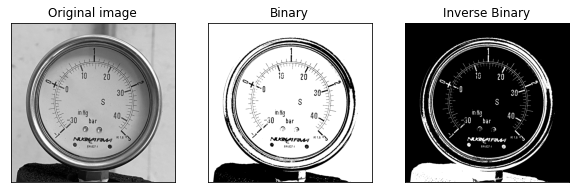

In [11]:
titles = ["Original image", "Binary", "Inverse Binary"]
images = [gray, thresh, thresh1]

plt.figure(figsize=(10, 7))
for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

### Find contour

In [12]:
contours, heirarchy = cv2.findContours(thresh1, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [13]:
largest_area = sorted(contours, key=cv2.contourArea)

### Draw contour

In [14]:
mask1 = np.zeros(img.shape[:2], dtype="uint8")

In [15]:
img_contour = cv2.drawContours(mask1, [largest_area[-1]], 0, (255, 255, 255, 255), -1)

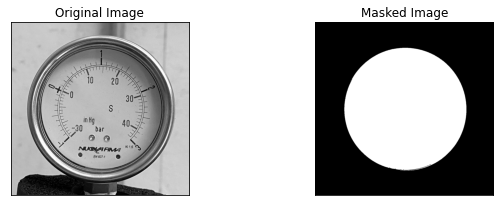

In [16]:
titles = ["Original Image", "Masked Image"]
images = [gray, img_contour]

plt.figure(figsize=(10, 7))
for i in range(2):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

## Adaptive Thresholding

In [17]:
adap_thresh = cv2.adaptiveThreshold(gray, 100, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 35, 2)

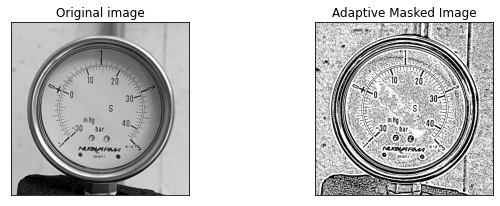

In [18]:
titles = ["Original image", "Adaptive Masked Image"]
images = [gray, adap_thresh]

plt.figure(figsize=(10, 7))
for i in range(2):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])


### Find contour

In [19]:
contours, heirarchy = cv2.findContours(adap_thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [20]:
largest_area = sorted(contours, key=cv2.contourArea)

In [21]:
img.shape[:2]

(1120, 1155)

### Draw contour

In [22]:
mask = np.zeros(img.shape[:2], dtype="uint8")
img_contour = cv2.drawContours(mask, [largest_area[-2]], 0, (255,255,255,255), -1)

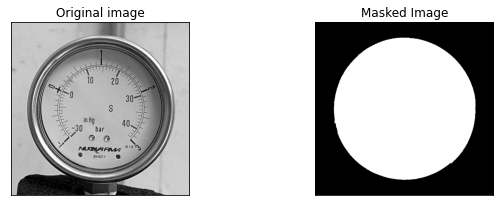

In [23]:
titles = ["Original image", "Masked Image"]
images = [gray, img_contour]

plt.figure(figsize=(10,7))
for i in range(2):
  plt.subplot(2,2,i+1)
  plt.imshow(images[i], cmap="gray")
  plt.title(titles[i])
  plt.xticks([])
  plt.yticks([])

## Extract the object

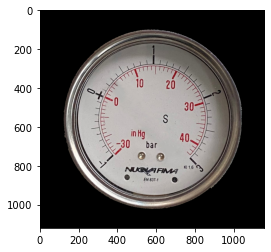

In [24]:
obj_detect = cv2.bitwise_or(img, img, mask=mask)
plt.imshow(cv2.cvtColor(obj_detect, cv2.COLOR_BGR2RGB))
plt.show() 

In [25]:
obj_detect.shape

(1120, 1155, 3)

In [27]:
# save image
cv2.imwrite("gauge_obj_detect.jpg", obj_detect)

True